<a href="https://colab.research.google.com/github/jpescobarn/Modelado-y-Simulaci-n-/blob/master/Final_Modelado_y_Simulaci%C3%B3n.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

#Final Modelado y Simulación 2020-1
# Juan Pablo Escobar Naranjo

### Solución de Ecuaciones diferenciales ordinarias por métodos numéricos.

In [202]:
import matplotlib.pyplot as plt
import numpy as np
import sympy 
from scipy import integrate
%matplotlib inline
x = sympy.Symbol('x')
y = sympy.Function('y')

Para empezar definirimos una ecuación arbitraria para estudiar

$$f=y(x)^3+x^2$$

In [203]:
# Asumimos una función
f = y(x)**3 + x**2


#Campo de dirección de una Ecuación Diferencial
def plot_direction_field(x, y_x, f_xy, x_lim=(-5, 5), y_lim=(-5, 5), ax=None):
    
    f_np = sympy.lambdify((x, y_x), f_xy, modules='numpy')
    x_vec = np.linspace(x_lim[0], x_lim[1], 20)
    y_vec = np.linspace(y_lim[0], y_lim[1], 20)
    
    if ax is None:
        _, ax = plt.subplots(figsize=(4, 4))
    
    dx = x_vec[1] - x_vec[0]
    dy = y_vec[1] - y_vec[0]
    
    for m, xx in enumerate(x_vec):
        for n, yy in enumerate(y_vec):
            Dy = f_np(xx, yy) * dx
            Dx = 0.8 * dx**2 / np.sqrt(dx**2 + Dy**2)
            Dy = 0.8 * Dy*dy / np.sqrt(dx**2 + Dy**2)
            ax.plot([xx - Dx/2, xx + Dx/2],
                    [yy - Dy/2, yy + Dy/2], 'b', lw=0.5)
    
    ax.axis('tight')
    ax.set_title(r"$%s$" %
                 (sympy.latex(sympy.Eq(y(x).diff(x), f_xy))),
                 fontsize=18)
    
    return ax

In [204]:
f_np = sympy.lambdify((y(x), x), f)
y0 = 0 
xp = np.linspace(0, 1.9, 100)
# Solución numérica
yp = integrate.odeint(f_np, y0, xp)

xn = np.linspace(0, -1.9, 100)
yn = integrate.odeint(f_np, y0, xn)

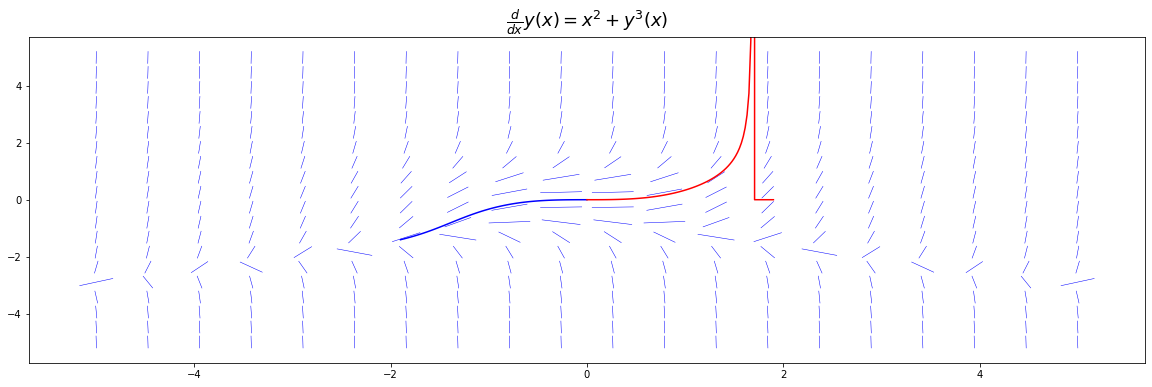

<Figure size 432x288 with 0 Axes>

In [205]:
fig, axes = plt.subplots(1, 1, figsize=(20, 6))
plot_direction_field(x, y(x), f, ax=axes)
axes.plot(xn, yn, 'b')
axes.plot(xp, yp, 'r')
plt.figure()
plt.show()

Generalmente, los problemas se presentan en forma de un sistema de ecuaciones diferenciales ordinarias, para ello consideraremos el siguiente sistema y usaremos el método de la ecuación o atractor de Lorenz. En caso tal de no conocer el método, en este repositorio hay un cuaderno en el que se especifica dicho método. 

$$ \dot{x}(t)= A(y-x)$$
$$ \dot{y}(t) = x(B-z)-y$$
$$ \dot{z}(t) = xy-Cz$$



In [206]:
# Definimos el sistema de ecuaciones
def f(xyz, t, A, B, C):
    x, y, z = xyz
    return [A * (y - x), 
           x * (B - z) - y,
           x * y - C * z]

A = 6
B = 30
C = 2.5

xyz0 = [1.0, 1.0, 1.0]
t = np.linspace(0, 25, 10000)

# Resolver ecuaciones
xyz1 = integrate.odeint(f, xyz0, t, args=(A, B, C))
xyz2 = integrate.odeint(f, xyz0, t, args=(A, B, 0.6*C))
xyz3 = integrate.odeint(f, xyz0, t, args=(2*A, B, 0.6*C))

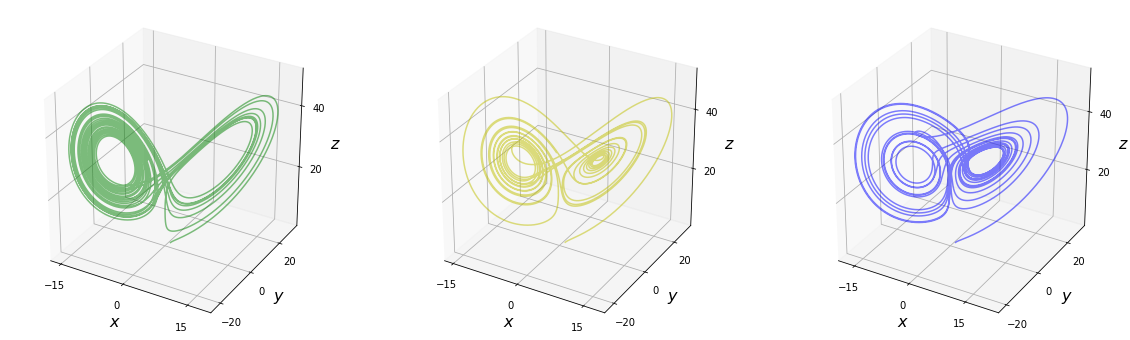

In [207]:
from mpl_toolkits.mplot3d.axes3d import Axes3D
fig, (ax1,ax2,ax3) = plt.subplots(1, 3, figsize=(20, 6),
                                  subplot_kw={'projection':'3d'})

for ax, xyz, c in [(ax1, xyz1, 'g'), (ax2, xyz2, 'y'), (ax3, xyz3, 'b')]:
    ax.plot(xyz[:,0], xyz[:,1], xyz[:,2], c, alpha=0.5)
    ax.set_xlabel('$x$', fontsize=16)
    ax.set_ylabel('$y$', fontsize=16)
    ax.set_zlabel('$z$', fontsize=16)
    ax.set_xticks([-15, 0, 15])
    ax.set_yticks([-20, 0, 20])
    ax.set_zticks([0, 20, 40])

In [208]:
pip install pynamical

In [209]:
import pandas as pd
import numpy as np
from pynamical import simulate, bifurcation_plot, phase_diagram, phase_diagram_3d
import matplotlib.pyplot as plt
import warnings
warnings.filterwarnings('ignore')

# graficos incrustados
%matplotlib inline

## Mapa logístico

El mapa logístico es considerado un modelo sencillo que busca explicar la dinámica de una población, en la que se supone un crecimiento cada vez más lento a medida que se acerca a una cantidad de individuos que se considera límite. Se simplificará la tasa de mortalidad y natalidad en un sólo valor. El modelo está dado por la siguiente ecuación: 


$$x_{t+1}=\beta x_t(1-x_t) $$

Donde, 

$\beta$ es la representación de la tasa de crecimiento y $x$ es la población en un momento dado. La población en un momento dado es una función del parámetro de la tasa de crecimiento y el nivel de población del intervalo de tiempo anterior. 



In [210]:
poblacion = simulate(num_gens=20, rate_min=0.5, rate_max=3.5, num_rates=7)
poblacion.applymap(lambda x: '{:03.3f}'.format(x))

,0.5,1.0,1.5,2.0,2.5,3.0,3.5
0,0.500,0.500,0.500,0.500,0.500,0.500,0.500
1,0.125,0.250,0.375,0.500,0.625,0.750,0.875
2,0.055,0.188,0.352,0.500,0.586,0.562,0.383
3,0.026,0.152,0.342,0.500,0.607,0.738,0.827
4,0.013,0.129,0.338,0.500,0.597,0.580,0.501
5,0.006,0.112,0.335,0.500,0.602,0.731,0.875
6,0.003,0.100,0.334,0.500,0.599,0.590,0.383
7,0.002,0.090,0.334,0.500,0.600,0.726,0.827
8,0.001,0.082,0.334,0.500,0.600,0.597,0.501
9,0.000,0.075,0.333,0.500,0.600,0.722,0.875


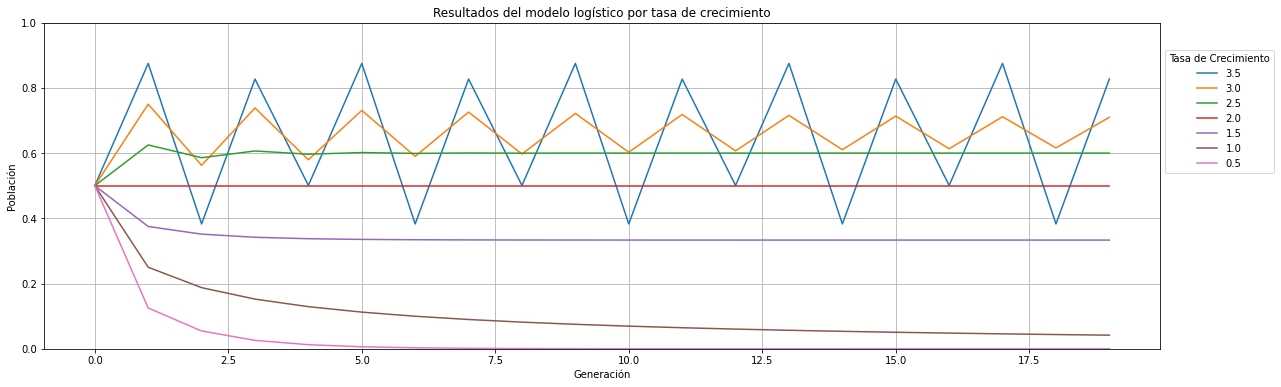

In [211]:
# Graficando los resultados
colores = ['yellow', 'green', 'blue', 'peru', 'black', 'red', 'grey']
for color, tasa in reversed(list(zip(colores, poblacion.columns))):
    ax = poblacion[tasa].plot(kind='line', figsize=[20, 6])
ax.grid(True)
ax.set_ylim([0, 1])
ax.legend(title='Tasa de Crecimiento', loc=3, bbox_to_anchor=(1, 0.525))
ax.set_title('Resultados del modelo logístico por tasa de crecimiento')
ax.set_xlabel('Generación')
ax.set_ylabel('Población')
plt.show()

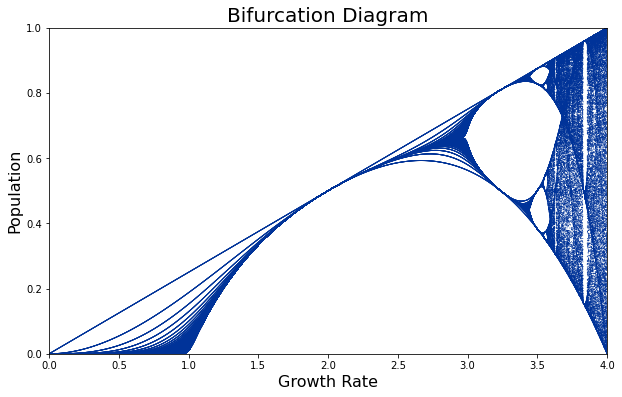

In [212]:
pops = simulate(num_gens=100, rate_min=0, rate_max=5, num_rates=5000, num_discard=1)
#Graficando el diagrama de bifurcación
bifurcation_plot(pops)